In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
import folium
from folium import Circle
from geopy import Nominatim

from sklearn.preprocessing import MinMaxScaler
from IPython.display import display

In [4]:
city = pd.read_csv('C:\\Users\\Ramki\\Downloads\\2. Cost of Living\\2. Cost of Living/cost-of-living.csv')
city.shape

(55, 161)

In [5]:
pd.set_option('max_columns', 170)
city.head()

,Unnamed: 0,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan","Guadalajara, Mexico","Kathmandu, Nepal","Hanoi, Vietnam","Ho Chi Minh City, Vietnam","Mexico City, Mexico","Rome, Italy","Monterrey, Mexico","Yekaterinburg, Russia","Sarajevo, Bosnia And Herzegovina","Kharkiv, Ukraine","Kiev, Ukraine","Calgary, Canada","Tunis, Tunisia","Edmonton, Canada","Amsterdam, Netherlands","Belgrade, Serbia","Odessa, Ukraine","Paris, France","Eindhoven, Netherlands","Plovdiv, Bulgaria","Thessaloniki, Greece","Ottawa, Canada","Sofia, Bulgaria","Rotterdam, Netherlands","Varna, Bulgaria","Novi Sad, Serbia","Utrecht, Netherlands","Berlin, Germany","Beirut, Lebanon","Austin, TX, United States","Singapore, Singapore","Toronto, Canada","Auckland, New Zealand","Podgorica, Montenegro","Vancouver, Canada","Tokyo, Japan","Victoria, Canada","Winnipeg, Canada","Boston, MA, United States","Chicago, IL, United States","Almaty, Kazakhstan","Oslo, Norway","Frankfurt, Germany","Bratislava, Slovakia","Dallas, TX, United States","Zagreb, Croatia","Hamburg, Germany","Krakow (Cracow), Poland","Riga, Latvia","Gdansk, Poland","Santiago, Chile","Nairobi, Kenya","Abu Dhabi, United Arab Emirates","Houston, TX, United States","Tbilisi, Georgia","Dubai, United Arab Emirates","Bogota, Colombia","Brno, Czech Republic","Munich, Germany","Poznan, Poland","Las Vegas, NV, United States","London, United Kingdom","Los Angeles, CA, United States","Panama City, Panama","Seoul, South Korea","Warsaw, Poland","Prague, Czech Republic","Wroclaw, Poland","Kuala Lumpur, Malaysia","New York, NY, United States","Copenhagen, Denmark","Ljubljana, Slovenia","Chandigarh, India","Colombo, Sri Lanka","Noida, India","Kaunas, Lithuania","Athens, Greece","Phoenix, AZ, United States","Hong Kong, Hong Kong","Portland, OR, United States","Lisbon, Portugal","Beijing, China","Cape Town, South Africa","Tirana, Albania","Porto, Portugal","Durban, South Africa","Budapest, Hungary","Vilnius, Lithuania","Johannesburg, South Africa","Barcelona, Spain","San Diego, CA, United States","San Francisco, CA, United States","Lima, Peru","Seattle, WA, United States","Brasov, Romania","Bucharest, Romania","Tashkent, Uzbekistan","Ahmedabad, India","Cluj-Napoca, Romania","Madrid, Spain","Tallinn, Estonia","Bangalore, India","Iasi, Romania","Chennai, India","Doha, Qatar","Delhi, India","Gurgaon, India","Valencia, Spain","Vienna, Austria","Hyderabad, India","Montevideo, Uruguay","Tel Aviv-Yafo, Israel","Timisoara, Romania","Taipei, Taiwan","Kolkata, India","Skopje, Macedonia","Shanghai, China","Bangkok, Thailand","Mumbai, India","Reykjavik, Iceland","Amman, Jordan","Pune, India","Stockholm, Sweden","Buenos Aires, Argentina","Minsk, Belarus","San Jose, Costa Rica","Casablanca, Morocco","Lodz, Poland","Montreal, Canada","Sao Paulo, Brazil","Gothenburg, Sweden","Dublin, Ireland","Moscow, Russia","Santo Domingo, Dominican Republic","Adelaide, Australia","Zurich, Switzerland","Yerevan, Armenia","Manila, Philippines","Brisbane, Australia","Jakarta, Indonesia","Ankara, Turkey","Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
0,"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.00,4.67,15.0,3.38,3.58,5.27,5.25,1.99,1.94,1.94,4.77,15.0,5.75,5.88,3.57,4.50,5.63,13.75,1.92,13.75,15.0,5.39,5.65,15.0,15.0,5.10,10.0,11.00,6.14,13.0,6.12,4.84,15.0,8.5,8.98,13.48,8.33,13.75,11.95,5.0,11.69,8.19,12.05,10.31,13.47,13.47,4.77,18.70,10.0,6.0,13.48,6.72,11.0,5.91,7.0,5.91,6.94,4.43,6.12,13.48,4.67,7.33,3.30,5.95,12.0,5.90,13.47,17.49,13.47,8.98,6.42,5.91,5.95,5.91,2.87,17.97,17.40,8.0,2.54,1.49,3.80,6.0,10.0,10.77,5.78,12.58,8.5,3.91,8.91,4.10,7.0,7.47,5.99,7.0,8.47,11.0,13.48,15.95,3.26,13.48,6.27,6.28,3.59,1.90,5.23,12.0,8.0,2.53,5.23,1.52,6.18,3.80,3.80,8.75,10.00,1

In [6]:
city.describe()

,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan","Guadalajara, Mexico","Kathmandu, Nepal","Hanoi, Vietnam","Ho Chi Minh City, Vietnam","Mexico City, Mexico","Rome, Italy","Monterrey, Mexico","Yekaterinburg, Russia","Sarajevo, Bosnia And Herzegovina","Kharkiv, Ukraine","Kiev, Ukraine","Calgary, Canada","Tunis, Tunisia","Edmonton, Canada","Amsterdam, Netherlands","Belgrade, Serbia","Odessa, Ukraine","Paris, France","Eindhoven, Netherlands","Plovdiv, Bulgaria","Thessaloniki, Greece","Ottawa, Canada","Sofia, Bulgaria","Rotterdam, Netherlands","Varna, Bulgaria","Novi Sad, Serbia","Utrecht, Netherlands","Berlin, Germany","Beirut, Lebanon","Austin, TX, United States","Singapore, Singapore","Toronto, Canada","Auckland, New Zealand","Podgorica, Montenegro","Vancouver, Canada","Tokyo, Japan","Victoria, Canada","Winnipeg, Canada","Boston, MA, United States","Chicago, IL, United States","Almaty, Kazakhstan","Oslo, Norway","Frankfurt, Germany","Bratislava, Slovakia","Dallas, TX, United States","Zagreb, Croatia","Hamburg, Germany","Krakow (Cracow), Poland","Riga, Latvia","Gdansk, Poland","Santiago, Chile","Nairobi, Kenya","Abu Dhabi, United Arab Emirates","Houston, TX, United States","Tbilisi, Georgia","Dubai, United Arab Emirates","Bogota, Colombia","Brno, Czech Republic","Munich, Germany","Poznan, Poland","Las Vegas, NV, United States","London, United Kingdom","Los Angeles, CA, United States","Panama City, Panama","Seoul, South Korea","Warsaw, Poland","Prague, Czech Republic","Wroclaw, Poland","Kuala Lumpur, Malaysia","New York, NY, United States","Copenhagen, Denmark","Ljubljana, Slovenia","Chandigarh, India","Colombo, Sri Lanka","Noida, India","Kaunas, Lithuania","Athens, Greece","Phoenix, AZ, United States","Hong Kong, Hong Kong","Portland, OR, United States","Lisbon, Portugal","Beijing, China","Cape Town, South Africa","Tirana, Albania","Porto, Portugal","Durban, South Africa","Budapest, Hungary","Vilnius, Lithuania","Johannesburg, South Africa","Barcelona, Spain","San Diego, CA, United States","San Francisco, CA, United States","Lima, Peru","Seattle, WA, United States","Brasov, Romania","Bucharest, Romania","Tashkent, Uzbekistan","Ahmedabad, India","Cluj-Napoca, Romania","Madrid, Spain","Tallinn, Estonia","Bangalore, India","Iasi, Romania","Chennai, India","Doha, Qatar","Delhi, India","Gurgaon, India","Valencia, Spain","Vienna, Austria","Hyderabad, India","Montevideo, Uruguay","Tel Aviv-Yafo, Israel","Timisoara, Romania","Taipei, Taiwan","Kolkata, India","Skopje, Macedonia","Shanghai, China","Bangkok, Thailand","Mumbai, India","Reykjavik, Iceland","Amman, Jordan","Pune, India","Stockholm, Sweden","Buenos Aires, Argentina","Minsk, Belarus","San Jose, Costa Rica","Casablanca, Morocco","Lodz, Poland","Montreal, Canada","Sao Paulo, Brazil","Gothenburg, Sweden","Dublin, Ireland","Moscow, Russia","Santo Domingo, Dominican Republic","Adelaide, Australia","Zurich, Switzerland","Yerevan, Armenia","Manila, Philippines","Brisbane, Australia","Jakarta, Indonesia","Ankara, Turkey","Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.00000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000

In [7]:
locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode('Istanbul, Turkey')

print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

Latitude = 41.0096334, Longitude = 28.9651646


In [8]:
city=city.T
city.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
Unnamed: 0,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three...",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, G...",1 min. of Prepaid Mobile Tariff Local (No Disc...,"Internet (60 Mbps or More, Unlimited Data, Cab...","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in Cit...,Price per Square Meter to Buy Apartment Outsid...,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yea...",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red M...,Toyota Corolla 1.6l 97kW Comfort (Or Equivalen...,"Preschool (or Kindergarten), Full Day, Private...","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,7.6,0.63,5.87,0.88,1.89,2.2,0.59,3.96,42.56,0.67,19289.4,524.45,344.27,1012.53,615.19,102.17,0.03,6.96,26.27,18.33,5.14,71.86,38.25,74.88,100.72,2476.05,1507.7,645.94,10.29,1.47,0.26,4.4,1.29,1.25,0.56,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,5.32,0.33,7.64,1.79,2.48,2.75,0.41,3.5,31.32,1.05,24443.2,291.55,177.72,545.5,314.98,59.33,0.11,14.2,25.1,15.66,3.82,36.15,25.91,61.31,50.58,1315.18,657.05,436,19.08,0.76,0.47,3.59,0.85,0.86,0.59,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,4.97,0.29,6.11,1.63,2.09,2.29,0.46,3.05,22.92,1.04,24443.2,212.22,128.36,353.76,225.34,51.07,0.09,12.89,20.64,11.67,3.06,33.2,22.48,52.74,42.2,856.54,508.14,392.07,22.23,0.61,0.57,3.51,0.77,0.73,0.52,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41
"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,6.87,1.54,12,2.23,2.95,7.7,2.8,9.42,59.7,1.54,22000,986.93,758.13,1819.32,1271.16,82.66,0.07,22.31,34.54,24.72,14,83.41,31.41,82.49,120.97,7444.54,4099.36,2382.56,1.38,6,1,47.04,2.1,1.75,0.91,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641


In [9]:
city.rename(columns=city.iloc[0], inplace = True)
city.drop(city.index[0], inplace=True)

In [10]:
city.head()

,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,7.6,0.63,5.87,0.88,1.89,2.2,0.59,3.96,42.56,0.67,19289.4,524.45,344.27,1012.53,615.19,102.17,0.03,6.96,26.27,18.33,5.14,71.86,38.25,74.88,100.72,2476.05,1507.7,645.94,10.29,1.47,0.26,4.4,1.29,1.25,0.56,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,5.32,0.33,7.64,1.79,2.48,2.75,0.41,3.5,31.32,1.05,24443.2,291.55,177.72,545.5,314.98,59.33,0.11,14.2,25.1,15.66,3.82,36.15,25.91,61.31,50.58,1315.18,657.05,436,19.08,0.76,0.47,3.59,0.85,0.86,0.59,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,4.97,0.29,6.11,1.63,2.09,2.29,0.46,3.05,22.92,1.04,24443.2,212.22,128.36,353.76,225.34,51.07,0.09,12.89,20.64,11.67,3.06,33.2,22.48,52.74,42.2,856.54,508.14,392.07,22.23,0.61,0.57,3.51,0.77,0.73,0.52,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41
"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,6.87,1.54,12,2.23,2.95,7.7,2.8,9.42,59.7,1.54,22000,986.93,758.13,1819.32,1271.16,82.66,0.07,22.31,34.54,24.72,14,83.41,31.41,82.49,120.97,7444.54,4099.36,2382.56,1.38,6,1,47.04,2.1,1.75,0.91,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641
"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,5.79,0.59,3.61,0.77,1.38,1.56,0.1,3.55,9.33,0.98,16335.1,244.49,177.96,428.67,330.84,113.46,0.07,8.58,26.64,12.1,5.19,56.54,35.37,86.25,94.38,904.82,589.13,286.95,9.42,1.3,0.18,3.11,0.7,1.22,0.56,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.1,210.52,2679.3


In [11]:
city = city.reset_index()
city.head()

,index,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,7.6,0.63,5.87,0.88,1.89,2.2,0.59,3.96,42.56,0.67,19289.4,524.45,344.27,1012.53,615.19,102.17,0.03,6.96,26.27,18.33,5.14,71.86,38.25,74.88,100.72,2476.05,1507.7,645.94,10.29,1.47,0.26,4.4,1.29,1.25,0.56,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,5.32,0.33,7.64,1.79,2.48,2.75,0.41,3.5,31.32,1.05,24443.2,291.55,177.72,545.5,314.98,59.33,0.11,14.2,25.1,15.66,3.82,36.15,25.91,61.31,50.58,1315.18,657.05,436,19.08,0.76,0.47,3.59,0.85,0.86,0.59,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,4.97,0.29,6.11,1.63,2.09,2.29,0.46,3.05,22.92,1.04,24443.2,212.22,128.36,353.76,225.34,51.07,0.09,12.89,20.64,11.67,3.06,33.2,22.48,52.74,42.2,856.54,508.14,392.07,22.23,0.61,0.57,3.51,0.77,0.73,0.52,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41
3,"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,6.87,1.54,12,2.23,2.95,7.7,2.8,9.42,59.7,1.54,22000,986.93,758.13,1819.32,1271.16,82.66,0.07,22.31,34.54,24.72,14,83.41,31.41,82.49,120.97,7444.54,4099.36,2382.56,1.38,6,1,47.04,2.1,1.75,0.91,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,5.79,0.59,3.61,0.77,1.38,1.56,0.1,3.55,9.33,0.98,16335.1,244.49,177.96,428.67,330.84,113.46,0.07,8.58,26.64,12.1,5.19,56.54,35.37,86.25,94.38,904.82,589.13,286.95,9.42,1.3,0.18,3.11,0.7,1.22,0.56,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.1,210.52,2679.3


In [12]:
city = city.rename(columns={'index': 'Location'})
city.head()

,Location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,7.6,0.63,5.87,0.88,1.89,2.2,0.59,3.96,42.56,0.67,19289.4,524.45,344.27,1012.53,615.19,102.17,0.03,6.96,26.27,18.33,5.14,71.86,38.25,74.88,100.72,2476.05,1507.7,645.94,10.29,1.47,0.26,4.4,1.29,1.25,0.56,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,5.32,0.33,7.64,1.79,2.48,2.75,0.41,3.5,31.32,1.05,24443.2,291.55,177.72,545.5,314.98,59.33,0.11,14.2,25.1,15.66,3.82,36.15,25.91,61.31,50.58,1315.18,657.05,436,19.08,0.76,0.47,3.59,0.85,0.86,0.59,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,4.97,0.29,6.11,1.63,2.09,2.29,0.46,3.05,22.92,1.04,24443.2,212.22,128.36,353.76,225.34,51.07,0.09,12.89,20.64,11.67,3.06,33.2,22.48,52.74,42.2,856.54,508.14,392.07,22.23,0.61,0.57,3.51,0.77,0.73,0.52,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41
3,"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,6.87,1.54,12,2.23,2.95,7.7,2.8,9.42,59.7,1.54,22000,986.93,758.13,1819.32,1271.16,82.66,0.07,22.31,34.54,24.72,14,83.41,31.41,82.49,120.97,7444.54,4099.36,2382.56,1.38,6,1,47.04,2.1,1.75,0.91,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,5.79,0.59,3.61,0.77,1.38,1.56,0.1,3.55,9.33,0.98,16335.1,244.49,177.96,428.67,330.84,113.46,0.07,8.58,26.64,12.1,5.19,56.54,35.37,86.25,94.38,904.82,589.13,286.95,9.42,1.3,0.18,3.11,0.7,1.22,0.56,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.1,210.52,2679.3


In [13]:
city.columns

Index(['Location', 'Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'One-way Ticket (Local Transport)',
       'Chicken Breasts (Boneless, Skinless), (1kg)',
       'Monthly Pass (Regular Price)', 'Gasoline (1 liter)', 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Cen

In [14]:
import warnings
warnings.filterwarnings('ignore')

from geopy.extra.rate_limiter import RateLimiter

In [15]:
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
city['location'] = city['Location'].apply(geocode)
city['point'] = city['location'].apply(lambda loc: tuple(loc.point) if loc else None)

city[['latitude', 'longitude', 'altitude']] = pd.DataFrame(city['point'].tolist(), index=city.index)

city.head()

,Location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",location,point,latitude,longitude,altitude
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,7.6,0.63,5.87,0.88,1.89,2.2,0.59,3.96,42.56,0.67,19289.4,524.45,344.27,1012.53,615.19,102.17,0.03,6.96,26.27,18.33,5.14,71.86,38.25,74.88,100.72,2476.05,1507.7,645.94,10.29,1.47,0.26,4.4,1.29,1.25,0.56,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86,"(Санкт-Петербург, Северо-Западный федеральный ...","(59.938732, 30.316229, 0.0)",59.938732,30.316229,0.0
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,5.32,0.33,7.64,1.79,2.48,2.75,0.41,3.5,31.32,1.05,24443.2,291.55,177.72,545.5,314.98,59.33,0.11,14.2,25.1,15.66,3.82,36.15,25.91,61.31,50.58,1315.18,657.05,436,19.08,0.76,0.47,3.59,0.85,0.86,0.59,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43,"(İstanbul, Beyazıt Mahallesi, Fatih, İstanbul,...","(41.0096334, 28.9651646, 0.0)",41.009633,28.965165,0.0
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,4.97,0.29,6.11,1.63,2.09,2.29,0.46,3.05,22.92,1.04,24443.2,212.22,128.36,353.76,225.34,51.07,0.09,12.89,20.64,11.67,3.06,33.2,22.48,52.74,42.2,856.54,508.14,392.07,22.23,0.61,0.57,3.51,0.77,0.73,0.52,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41,"(İzmir, Ege Bölgesi, 35240, Türkiye, (38.41473...","(38.4147331, 27.1434119, 0.0)",38.414733,27.143412,0.0
3,"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,6.87,1.54,12,2.23,2.95,7.7,2.8,9.42,59.7,1.54,22000,986.93,758.13,1819.32,1271.16,82.66,0.07,22.31,34.54,24.72,14,83.41,31.41,82.49,120.97,7444.54,4099.36,2382.56,1.38,6,1,47.04,2.1,1.75,0.91,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641,"(Helsinki, Helsingin seutukunta, Uusimaa, Etel...","(60.1674098, 24.9425769, 0.0)",60.167410,24.942577,0.0
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,5.79,0.59,3.61,0.77,1.38,1.56,0.1,3.55,9.33,0.98,16335.1,244.49,177.96,428.67,330.84,113.46,0.07,8.58,26.64,12.1,5.19,56.54,35.37,86.25,94.38,904.82,589.13,286.95,9.42,1.3,0.18,

In [16]:
city = city.drop(['location','point','altitude'], axis = 1)
city.columns

Index(['Location', 'Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'One-way Ticket (Local Transport)',
       'Chicken Breasts (Boneless, Skinless), (1kg)',
       'Monthly Pass (Regular Price)', 'Gasoline (1 liter)', 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Cen

In [17]:
def food(city):
    return int(round((city[['Meal, Inexpensive Restaurant',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'Chicken Breasts (Boneless, Skinless), (1kg)', 'Apples (1kg)', 'Oranges (1kg)',
       'Potato (1kg)', 'Lettuce (1 head)', 'Cappuccino (regular)',
       'Rice (white), (1kg)', 'Tomato (1kg)', 'Banana (1kg)', 'Onion (1kg)',
       'Beef Round (1kg) (or Equivalent Back Leg Red Meat)',]].mean()).mean()))

def travel(city):
    return int(round((city[['One-way Ticket (Local Transport)',
                            'Monthly Pass (Regular Price)', 'Gasoline (1 liter)',
                           'Taxi Start (Normal Tariff)', 'Taxi 1km (Normal Tariff)',
                           'Taxi 1hour Waiting (Normal Tariff)',]].mean()).mean()))

def living(city):
    return int(round((city[[ 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Centre',
       'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment',
         'Price per Square Meter to Buy Apartment in City Centre',
       'Price per Square Meter to Buy Apartment Outside of Centre',
        'Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car)',]].mean()).mean()))

def lifestyle(city):
    return int(round((city[['1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans)',
       'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)',
       'Fitness Club, Monthly Fee for 1 Adult',
       'Tennis Court Rent (1 Hour on Weekend)',
       'Cinema, International Release, 1 Seat',
       '1 Pair of Jeans (Levis 501 Or Similar)',
       '1 Summer Dress in a Chain Store (Zara, H&M, ...)',
       '1 Pair of Nike Running Shoes (Mid-Range)',
       '1 Pair of Men Leather Business Shoes', 
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',]].mean()).mean()))

def education(city):
    return int(round((city[['Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child',
       'International Primary School, Yearly for 1 Child',]].mean()).mean()))

def income(city):
    return int(round((city[['Average Monthly Net Salary (After Tax)',
       'Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate',]].mean()).mean()))

In [18]:
city['Food'] = city.apply(food, axis = 1)
city['Travel'] = city.apply(travel, axis = 1)
city['Living'] = city.apply(living, axis = 1)
city['Lifestyle'] = city.apply(lifestyle, axis = 1)
city['Education'] = city.apply(education, axis = 1)
city['Income'] = city.apply(income, axis = 1)

In [22]:
city['country']=city['Location'].str.split(', ')
city['Country'] = city['country'].apply(lambda x: x[1])
city['Country'].value_counts()

India        11
Canada        8
Poland        6
Romania       5
Australia     5
             ..
Slovenia      1
Indonesia     1
Tunisia       1
Thailand      1
Croatia       1
Name: Country, Length: 90, dtype: int64

In [24]:
city[['Country','Food','Travel',
      'Living','Lifestyle','Education','Income']].groupby(['Country']).agg('mean').style.background_gradient(cmap = 'Wistia')

,Food,Travel,Living,Lifestyle,Education,Income
Country,,,,,,
AZ,4.000000,16.000000,5114.000000,35.000000,7088.000000,1559.000000
Albania,2.000000,5.000000,4157.000000,29.000000,1225.000000,171.000000
Argentina,2.000000,3.000000,4346.000000,28.000000,1638.000000,266.000000
Armenia,2.000000,3.000000,4390.000000,30.000000,1581.000000,154.000000
Australia,4.400000,21.600000,4932.200000,38.600000,5919.400000,1400.800000
Austria,4.000000,14.000000,6662.000000,40.000000,8124.000000,951.000000
Azerbaijan,2.000000,2.000000,4164.000000,32.000000,2933.000000,151.000000
Belarus,2.000000,3.000000,3932.000000,33.000000,2874.000000,224.000000
Belgium,4.000000,15.000000,5773.000000,42.000000,9519.000000,1146.000000


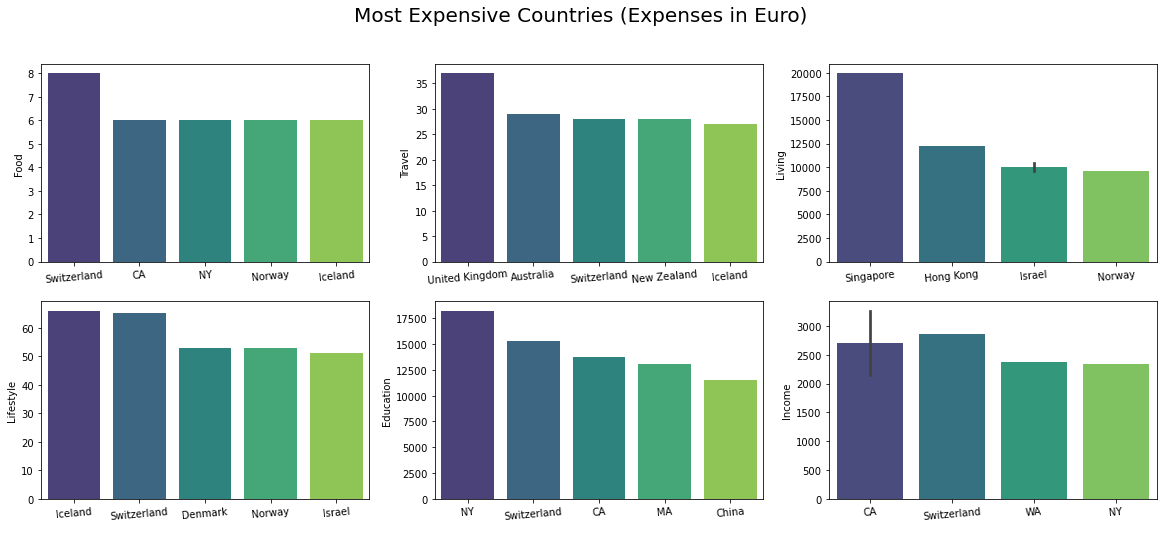

In [28]:
plt.rcParams['figure.figsize']=(20,8)

plt.subplot(231)
x = city[['Country','Food']].sort_values(by = 'Food', ascending = False).head(5)
sns.barplot(x['Country'], x['Food'], palette = 'viridis')
plt.xticks(rotation = 5)
plt.xlabel(' ')

plt.subplot(232)
x= city[['Country', 'Travel']].sort_values(by='Travel', ascending=False).head(5)
sns.barplot(x['Country'], x['Travel'], palette = 'viridis')
plt.xticks(rotation=5)
plt.xlabel(' ')

plt.subplot(233)
x= city[['Country', 'Living']].sort_values(by='Living', ascending=False).head(5)
sns.barplot(x['Country'], x['Living'], palette = 'viridis')
plt.xticks(rotation=5)
plt.xlabel(' ')

plt.subplot(234)
x= city[['Country', 'Lifestyle']].sort_values(by='Lifestyle', ascending=False).head(5)
sns.barplot(x['Country'], x['Lifestyle'], palette = 'viridis')
plt.xticks(rotation=5)
plt.xlabel(' ')

plt.subplot(235)
x= city[['Country', 'Education']].sort_values(by='Education', ascending=False).head(5)
sns.barplot(x['Country'], x['Education'], palette = 'viridis')
plt.xticks(rotation=5)
plt.xlabel(' ')

plt.subplot(236)
x= city[['Country', 'Income']].sort_values(by='Income', ascending=False).head(5)
sns.barplot(x['Country'], x['Income'], palette = 'viridis')
plt.xticks(rotation=5)
plt.xlabel(' ')

plt.suptitle('Most Expensive Countries (Expenses in Euro)', fontsize = 20)
plt.show()

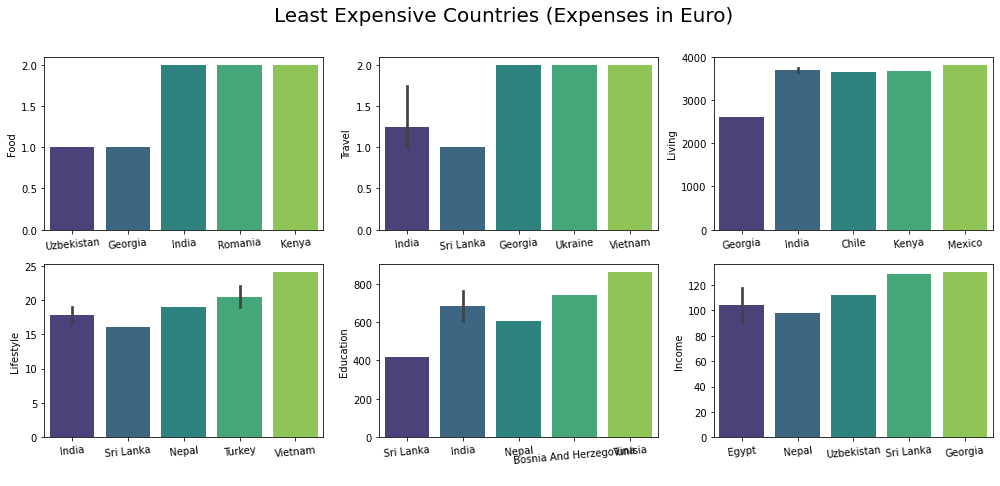

In [41]:
plt.rcParams['figure.figsize']=(17,7)

plt.subplot(231)
x = city[['Country','Food']].sort_values(by = 'Food', ascending = True).head(5)
sns.barplot(x['Country'], x['Food'], palette = 'viridis')
plt.xticks(rotation = 5)
plt.xlabel(' ')

plt.subplot(232)
x= city[['Country', 'Travel']].sort_values(by='Travel', ascending=True).head(8)
sns.barplot(x['Country'], x['Travel'], palette = 'viridis')
plt.xticks(rotation=5)
plt.xlabel(' ')

plt.subplot(233)
x= city[['Country', 'Living']].sort_values(by='Living', ascending=True).head(7)
sns.barplot(x['Country'], x['Living'], palette = 'viridis')
plt.xticks(rotation=5)
plt.xlabel(' ')

plt.subplot(234)
x= city[['Country', 'Lifestyle']].sort_values(by='Lifestyle', ascending=True).head(18)
sns.barplot(x['Country'], x['Lifestyle'], palette = 'viridis')
plt.xticks(rotation=5)
plt.xlabel(' ')

plt.subplot(235)
x= city[['Country', 'Education']].sort_values(by='Education', ascending=True).head(8)
sns.barplot(x['Country'], x['Education'], palette = 'viridis')
plt.xticks(rotation=5)
plt.xlabel(' ')

plt.subplot(236)
x= city[['Country', 'Income']].sort_values(by='Income', ascending=True).head(6)
sns.barplot(x['Country'], x['Income'], palette = 'viridis')
plt.xticks(rotation=5)
plt.xlabel(' ')

plt.suptitle('Least Expensive Countries (Expenses in Euro)', fontsize = 20)
plt.show()

In [42]:
top_range = (city.describe().loc['min',:]/city.describe().loc['max',:]).sort_values().index[2:22]
list(top_range)

['Education', 'Travel', 'Income', 'Food', 'Living', 'Lifestyle']

In [64]:
def color_producer(val):
    if val <= city[item].quantile(.25):
        return 'forestgreen'
    elif val <= city[item].quantile(.50):
        return 'goldenrod'
    elif val <= city[item].quantile(.75):
        return 'darkred'
    else:
        return 'blue'

In [66]:
map = folium.Map(location=[city['latitude'].mean(),
                           city['longitude'].mean()],
                 tiles='Stamen Terrain',
                 zoom_start=2)

item = top_range[0]

# Add a bubble map to the base map
for i in range(0,len(city)):
    Circle(
        location=[city.iloc[i]['latitude'], city.iloc[i]['longitude']],
        radius=120000,
        color=color_producer(city.iloc[i][item])).add_to(map)

print ('Price of: ', item)
map

Price of:  Education


In [76]:
map = folium.Map(location=[city['latitude'].mean(),
                           city['longitude'].mean()],
                 tiles='Stamen Terrain',
                 zoom_start=2)

item = top_range[3]

# Add a bubble map to the base map
for i in range(0,len(city)):
    Circle(
        location=[city.iloc[i]['latitude'], city.iloc[i]['longitude']],
        radius=120000,
        color=color_producer(city.iloc[i][item])).add_to(map)

print ('Price of: ', item)
map

Price of:  Food


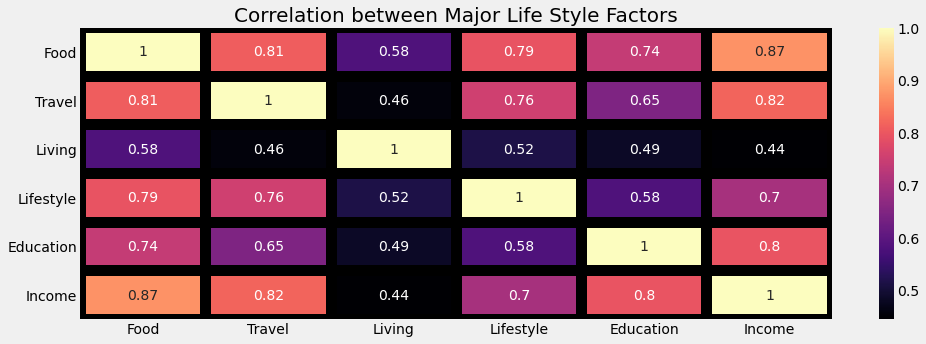

In [77]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.heatmap(city[['Food','Travel','Living','Lifestyle','Education','Income']].corr(),
            cmap = 'magma', 
            annot = True, linecolor='black', linewidths = 10)
plt.title('Correlation between Major Life Style Factors', fontsize = 20)
plt.show()

### Comparing india with other countries

In [82]:
city[(city['Country'] == 'Singapore') | (city['Country'] == 'India') | (city['Country'] == 'Malaysia')][['Location','Food', 'Travel','Living',
                    'Lifestyle','Education','Income']].set_index('Location').style.background_gradient(cmap = 'copper')

,Food,Travel,Living,Lifestyle,Education,Income
Location,,,,,,
"Singapore, Singapore",5,16,19937,41,9678,1495
"Kuala Lumpur, Malaysia",3,5,7231,27,3104,464
"Chandigarh, India",2,2,3880,19,896,195
"Noida, India",2,3,3711,19,1139,273
"Ahmedabad, India",2,1,3753,16,635,157
"Bangalore, India",2,3,4147,17,1281,294
"Chennai, India",2,3,4026,15,761,207
"Delhi, India",2,3,3919,19,872,242
"Gurgaon, India",2,3,4089,22,1308,434


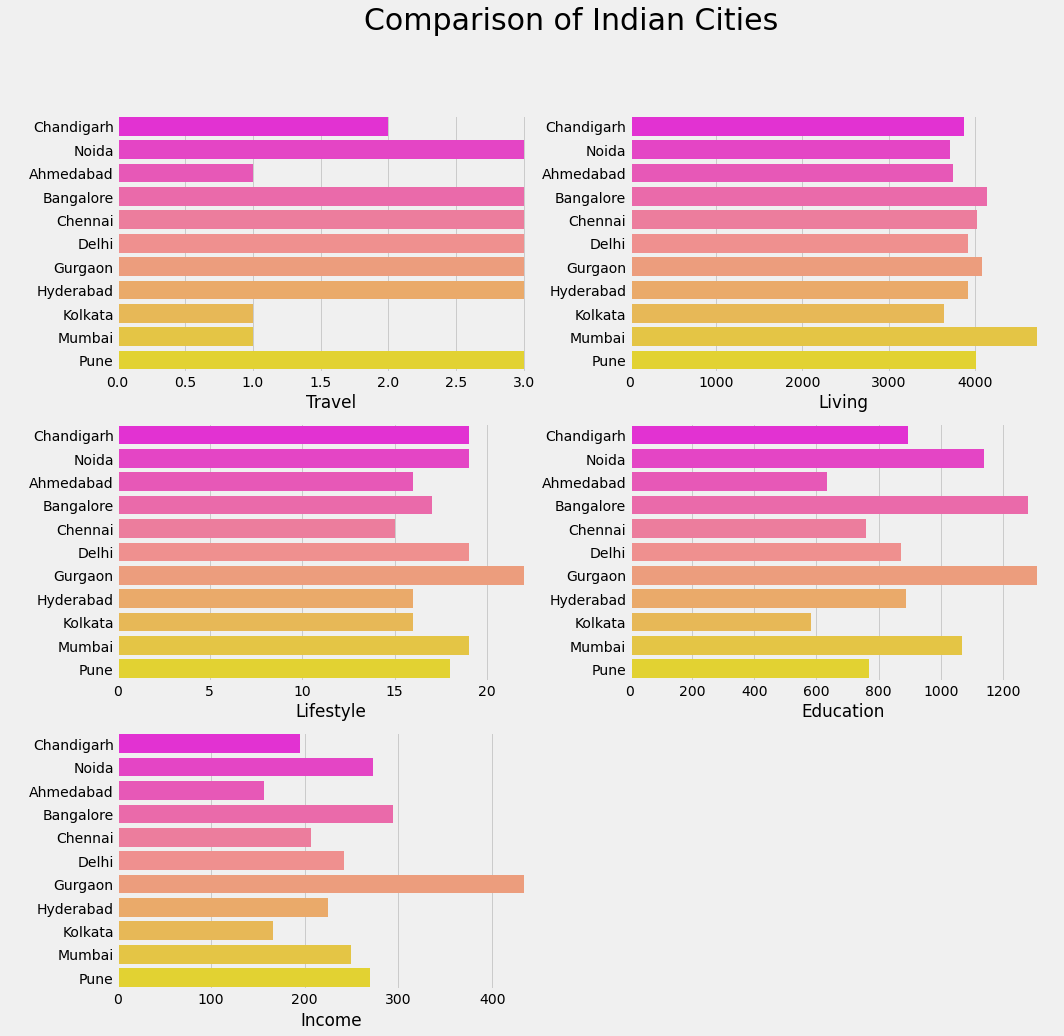

In [83]:
city['City'] = city['Location'].str.split(', ')
city['City'] = city['City'].apply(lambda x: x[0])

x = city[city['Country'] == 'India']

plt.rcParams['figure.figsize'] = (15, 15)
plt.subplot(3, 2, 1)
sns.barplot(y = x['City'], x = x['Travel'], palette = 'spring')
plt.ylabel(" ")

plt.subplot(3, 2, 2)
sns.barplot(y = x['City'], x = x['Living'], palette = 'spring')
plt.ylabel(" ")

plt.subplot(3, 2, 3)
sns.barplot(y = x['City'], x = x['Lifestyle'], palette = 'spring')
plt.ylabel(" ")

plt.subplot(3, 2, 4)
sns.barplot(y = x['City'], x = x['Education'], palette = 'spring')
plt.ylabel(" ")

plt.subplot(3, 2, 5)
sns.barplot(y = x['City'], x = x['Income'], palette = 'spring')
plt.ylabel(" ")

plt.suptitle('Comparison of Indian Cities', fontsize = 30)
plt.show()

### Most Expensive cities to live

In [84]:
x = city[['Food','Travel','Living','Lifestyle','Education','Income']]
mm = MinMaxScaler()
data = mm.fit_transform(x)
data = pd.DataFrame(data)
data.columns = x.columns

data['Total Score'] = (data['Food'] + data['Travel'] + data['Living'] + 
                       data['Lifestyle'] + data['Education'] + data['Income'])/6

# concat city
cities = city[['City', 'Country']]
data = pd.concat([data, cities], axis = 1)
# lets sort the values
data[['Country','City','Total Score']].sort_values(by = 'Total Score', ascending = False).head(10)

,Country,City,Total Score
144,Switzerland,Zurich,0.790375
78,NY,New York,0.670422
100,CA,San Francisco,0.660000
39,Singapore,Singapore,0.576437
70,United Kingdom,London,0.558841
128,Iceland,Reykjavik,0.557198
102,WA,Seattle,0.539670
50,Norway,Oslo,0.534259
47,MA,Boston,0.525962
71,CA,Los Angeles,0.487471


### Cheapest places to live

In [85]:
data[['Country', 'City', 'Total Score']].sort_values(by = 'Total Score').head(10)

,Country,City,Total Score
123,India,Kolkata,0.042501
106,India,Ahmedabad,0.043629
112,India,Chennai,0.056045
63,Georgia,Tbilisi,0.057976
118,India,Hyderabad,0.060394
81,India,Chandigarh,0.063713
130,India,Pune,0.069141
82,Sri Lanka,Colombo,0.069626
114,India,Delhi,0.070959
127,India,Mumbai,0.071562


In [87]:
# We know that the Most common things in day to day life are
# Internet, Basic Food ItemS such as Eggs, Milk, Breads, Electricity and Water, Taxi Travel

x = city[['Country','City','Milk (regular), (1 liter)',
         'Eggs (regular) (12)', 'Loaf of Fresh White Bread (500g)',
         'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)',
         'Taxi 1km (Normal Tariff)',
         'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment',
          ]]

# lets rename these columns
x = x.rename(columns = {'Milk (regular), (1 liter)':'Milk','Eggs (regular) (12)':'Eggs', 
                       'Loaf of Fresh White Bread (500g)': 'Bread',
                       'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)': 'Internet',
                       'Taxi 1km (Normal Tariff)':'Taxi Travel',
                       'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment':'Electricity and Water'})

x[['Milk','Bread','Eggs','Internet','Taxi Travel','Electricity and Water']].astype('float').describe()



,Milk,Bread,Eggs,Internet,Taxi Travel,Electricity and Water
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,0.998938,1.197875,1.902812,29.660875,0.922250,107.106125
std,0.391720,0.760670,0.752520,18.908249,0.709011,51.553830
min,0.390000,0.100000,0.750000,4.440000,0.140000,18.560000
25%,0.710000,0.555000,1.377500,12.832500,0.405000,63.860000
50%,0.895000,1.020000,1.850000,26.615000,0.630000,102.465000
75%,1.170000,1.690000,2.352500,43.317500,1.350000,145.707500
max,2.640000,3.330000,5.330000,93.290000,4.160000,265.520000


In [88]:
plt.rcParams['figure.figsize'] = (10, 3)
# lets check those Countries where Milk is very Expensive
print(x[x['Milk'] > 1.17][['Country','City','Milk']].sort_values(by = 'Milk',
                                    ascending = False).head(5).set_index('Country'))

print('\n')
# lets check those Countries where Bread is very Expensive
print(x[x['Bread'] > 1.69][['Country','City','Bread']].sort_values(by = 'Bread',
                                    ascending = False).head(5).set_index('Country'))

print('\n')
# lets check those Countries where Bread is very Expensive
print(x[x['Eggs'] > 2.35][['Country','City','Eggs']].sort_values(by = 'Eggs',
                                    ascending = False).head(5).set_index('Country'))

print('\n')
# lets check those Countries where Bread is very Expensive
print(x[x['Internet'] > 43.31][['Country','City','Internet']].sort_values(by = 'Internet',
                                    ascending = False).head(5).set_index('Country'))

print('\n')
# lets check those Countries where Bread is very Expensive
print(x[x['Taxi Travel'] > 1.35][['Country','City','Taxi Travel']].sort_values(by = 'Taxi Travel',
                                    ascending = False).head(5).set_index('Country'))

print('\n')
# lets check those Countries where Bread is very Expensive
print(x[x['Electricity and Water'] > 145.70][['Country','City',
                        'Electricity and Water']].sort_values(by = 'Electricity and Water',
                                    ascending = False).head(5).set_index('Country'))

                  City  Milk
Country                     
Taiwan          Taipei  2.64
Hong Kong    Hong Kong  2.54
China         Shanghai  2.39
Singapore    Singapore  2.04
South Korea      Seoul  1.95


                  City Bread
Country                     
NY            New York  3.33
CA           San Diego  3.27
CA       San Francisco  3.12
CA         Los Angeles  2.99
Norway            Oslo  2.92


                  City  Eggs
Country                     
Switzerland     Zurich  5.33
Iceland      Reykjavik   4.8
Norway            Oslo  3.79
France           Paris   3.4
Israel       Jerusalem  3.32


                           City Internet
Country                                 
United Arab Emirates  Abu Dhabi    93.29
United Arab Emirates      Dubai    90.42
Qatar                      Doha    78.31
AZ                      Phoenix    67.23
Costa Rica             San Jose     65.3


                             City Taxi Travel
Country                                      
Swit

### Recommending better cities to live like chennai

In [90]:
def recommend_better_cities(citi, factor = 'Lifestyle'):
    x = city[['City','Food','Education','Lifestyle','Travel', 'Income']]
    food = x[x['City'] == citi]['Food']
    edu = x[x['City'] == citi]['Education']
    life = x[x['City'] == citi]['Lifestyle']
    travel = x[x['City'] == citi]['Travel']
    income = x[x['City'] == citi]['Income']
    best_cities = x[(x['Food'] > food.values[0]) & (x['Education'] > edu.values[0]) & 
                   (x['Lifestyle'] > life.values[0]) & (x['Travel'] > travel.values[0]) &
                   (x['Income'] > income.values[0])]
    best = best_cities.sort_values(by = factor, ascending = False).head(10)
    return best['City'].reset_index(drop = True)

In [92]:
recommend_better_cities('Chennai')

0        Reykjavik
1           Zurich
2             Oslo
3       Copenhagen
4    Tel Aviv-Yafo
5    San Francisco
6        Jerusalem
7        Amsterdam
8            Milan
9            Dubai
Name: City, dtype: object